In [ ]:
using DrWatson
@quickactivate "APLG"
include(srcdir("plotting.jl"));
include(srcdir("travelling.jl"));
include(srcdir("phase_diag.jl"));
using PyPlot, LaTeXStrings

In [2]:
fig, axs = subplots(2,2,figsize=(10,10));
rc("text", usetex=true);
plt.close(fig);

In [3]:
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 840, 1.5
param, ps = get_param_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ)
f,u,c = load_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ)
# check densities
    ϕp = sum(f)/Nx-sum(f[:,1:2])/Nx
    ϕa = sum(f[:,1:2])/Nx
#
rhodiff = u[ind+1] - u[ind]
err, erri, avmag, cep = check_u_outer2(u,ps);
println("ϕa,ϕp=($(d4(ϕa)),$(d4(ϕp))): rhodiff=$(rhodiff), c =$(c), avmag=$(avmag), err=$(err),$(erri), ind=$(ind)")

show_f_reduced([axs[1],axs[2]],fig,16,param,f; c=c,point=ind-Nx÷2,typesol=3)

/Users/bruna/Documents/People/Mason_James/Nonreciprocal_APLG/data/pm_pdes_pro/outer_sol/outer_sol_2/[DT,v0,DR,Nx,ind,γ]=[1.0, 7.5, 1.0, 1024.0, 840.0, 1.5].jld2
ϕa,ϕp=(0.4608,0.2201): rhodiff=0.14583698540986623, c =0.002778934324554162, avmag=0.0, err=9.167291925571419e-11,837, ind=840


PyObject <matplotlib.collections.PathCollection object at 0x35634e1b0>

In [4]:
Lx,Nx,ϕa,ϕp,v0,ind,γ = 100.0, 1024, 0.3, 0.3, 7.5, 840, 1.5
ϕa,ϕp= 0.4608,0.2201
γ = (1-ϕa)/(1-ϕa-ϕp)
param, ps = get_param_outer2(Lx,Nx,ϕa,ϕp,v0,ind,γ)

ϕaL, ϕaR, ϕL, ϕR = get_BC(γ ,v0)
ϕpL, ϕpR = ϕL-ϕaL, ϕR-ϕaR
f = vcat([ϕaL/2 ϕaL/2  ϕpL] .* ones(ind-512), [ϕaR/2 ϕaR/2  ϕpR] .* ones(1024-ind),[ϕaL/2 ϕaL/2  ϕpL] .* ones(512))

show_f_reduced([axs[3],axs[4]],fig,16,param,f; c=c,point=ind-Nx÷2,typesol=3)
axs[3].get_legend().remove()
axs[4].get_legend().remove()

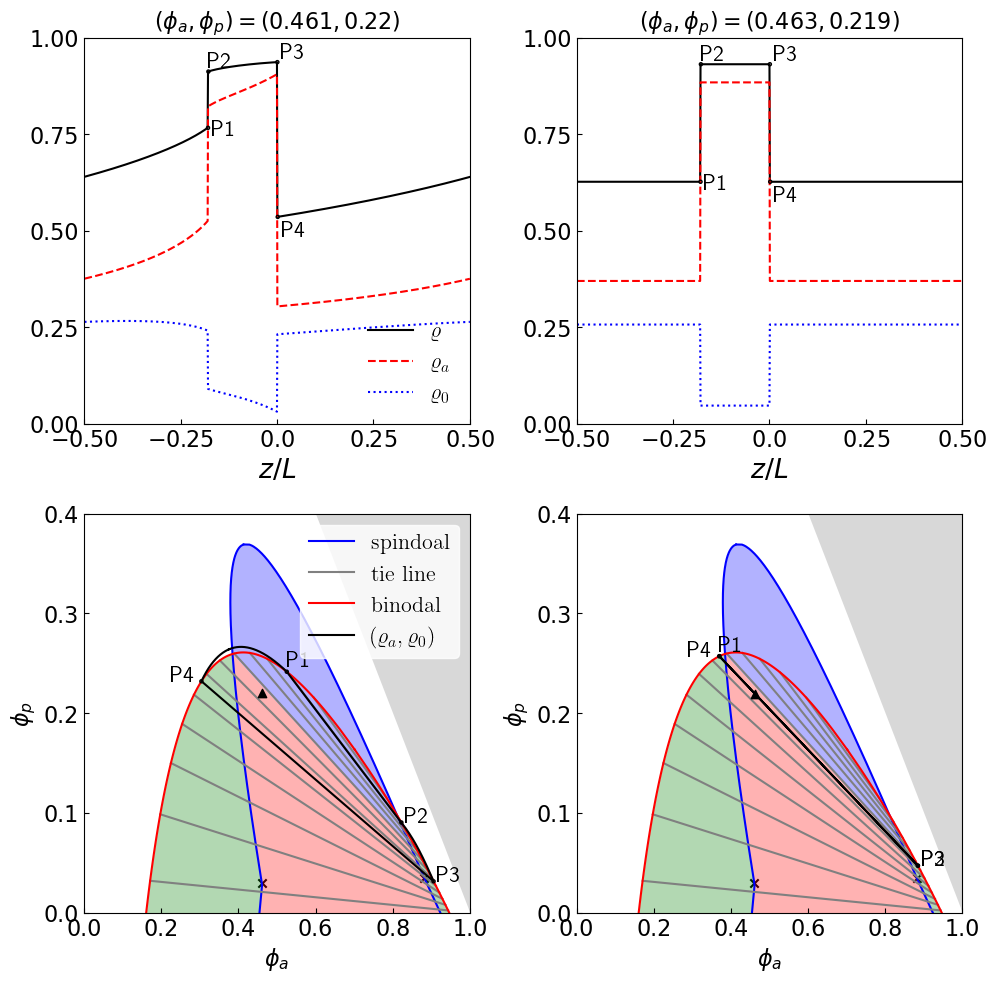

In [5]:
fig.tight_layout()
display(fig)